#                     FLM call tracking revenue analysis for 1st quarter 2021
 

##  Business Problem  

Sales department needs to measure the efficiency of sales calls made by their team  and wanted  to find out the relationships with sales revenues
The challenge here everyday number of calls are made and tracking the outcome may not be feasible always whether it is turned into business incident or not .
Call durations are segregated for 1st quarter of 2021 , to be analyzed how effectively the call data is incorporated as significance of sales win or lost . 


## Project Objective and Scope

All call data to be downloaded from ESA server, sales revenue data will be given by the stake holder.
We will have to find out the trends observed in terms of sellers calls made and acquired revenues 
Identify the most popular group ,max and minimum seller variables 


## Project Approach 

A typical Lifecycle can be adopted for this assignment, as follows: 
1. Data Preparation 
2. Exploratory Analysis
4. Communicating Results

##  Data Preparation  

1. All call data to extracted month wise for Jan to Mar 2021 from ESA server

2. Monthly collected data will be joined  with unique key of  Jan to Mar 2021  output to be saved  in single file 

3. FMS data  to be collected from ESA team since we do not have direct access 

4. FMS table data has  all employee details and this has to be merged with call data which has collected  earlier.

5. Further  sale revenue data needs to be merged correctly because this has employee wise unique records 

6. Call data is bifurcated with start and end data of each call so one employee may have often records 

7. Duplicate records will be removed while merging with sales revenue data because adding duplicate records can lead to have more sale revenue over sightly


In [1]:
import pyodbc 
import jaydebeapi 

In [2]:
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('chesterish')

In [3]:
import jpype
import ibm_db
import ibm_db_dbi
from pandas.io import sql
import pandas.io.sql as psql

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
import datetime
from datetime import datetime as dt
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
# %matplotlib inline
# sns.set()

In [5]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

## ESA server connection 

In [6]:
# # #To connect to ESA Database which is NetezzaSQL, install odbc driver.
# print (pyodbc.dataSources()) 
# conn = pyodbc.connect('DRIVER={NetezzaSQL};'\
# 'SERVER=;'\
# 'PORT=;'\
# 'DATABASE=;'\
# 'UID=;PWD=;')

## Importing data from 1st January 2021 to 31st May  2021

In [7]:
# # # query1 = 'select * from EDGEDM.CRM_SELLER_CALL_FACT WHERE DATE_ENTERED BETWEEN 2020-01-01 AND 2020-12-01'
# sql = """ SELECT EDGEDM.CRM_SELLER_CALL_FACT.SNAPSHOT_CURR_WEEK_INDC,
# EDGEDM.CRM_SELLER_CALL_FACT.SNAPSHOT_WK_QTRYR_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.CRM_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.CRM_SOURCE,
# EDGEDM.CRM_SELLER_CALL_FACT.ACTIVE_INDC,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_ENTERED,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_MODIFIED,
# EDGEDM.CRM_SELLER_CALL_FACT.CNUM,
# EDGEDM.CRM_SELLER_CALL_FACT.INTERACTION_TYPE,
# EDGEDM.CRM_SELLER_CALL_FACT.DIRECTION,
# EDGEDM.CRM_SELLER_CALL_FACT.STATUS,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_START,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_END,
# EDGEDM.CRM_SELLER_CALL_FACT.START_DAY_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.END_DAY_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.CALL_WEEK_MNEMONIC_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.PARENT_TYPE,
# EDGEDM.CRM_SELLER_CALL_FACT.PARENT_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.TAGS,
# EDGEDM.CRM_SELLER_CALL_FACT.DURATION,
# EDGEDM.CRM_SELLER_CALL_FACT.IW_ROW_UPDT_TS

# FROM EDGEDM.CRM_SELLER_CALL_FACT
# WHERE EDGEDM.CRM_SELLER_CALL_FACT.DATE_START BETWEEN ? AND ? ;"""

# df1 = pd.read_sql_query(sql, conn, params=['2021-01-01','2021-01-01'])

## Importing data from 1st January 2021 to 31st March 2021

Since the data rannge is requed huge momery , we have to extract it month wise 

In [8]:
# sql = """ SELECT EDGEDM.CRM_SELLER_CALL_FACT.SNAPSHOT_CURR_WEEK_INDC,
# EDGEDM.CRM_SELLER_CALL_FACT.SNAPSHOT_WK_QTRYR_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.CRM_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.CRM_SOURCE,
# EDGEDM.CRM_SELLER_CALL_FACT.ACTIVE_INDC,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_ENTERED,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_MODIFIED,
# EDGEDM.CRM_SELLER_CALL_FACT.CNUM,
# EDGEDM.CRM_SELLER_CALL_FACT.INTERACTION_TYPE,
# EDGEDM.CRM_SELLER_CALL_FACT.DIRECTION,
# EDGEDM.CRM_SELLER_CALL_FACT.STATUS,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_START,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_END,
# EDGEDM.CRM_SELLER_CALL_FACT.START_DAY_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.END_DAY_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.CALL_WEEK_MNEMONIC_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.PARENT_TYPE,
# EDGEDM.CRM_SELLER_CALL_FACT.PARENT_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.TAGS,
# EDGEDM.CRM_SELLER_CALL_FACT.DURATION,
# EDGEDM.CRM_SELLER_CALL_FACT.IW_ROW_UPDT_TS

# FROM EDGEDM.CRM_SELLER_CALL_FACT
# WHERE YEAR(EDGEDM.CRM_SELLER_CALL_FACT.DATE_START) = ? AND MONTH(EDGEDM.CRM_SELLER_CALL_FACT.DATE_START) = ?; """


#### Import data from sql serve for May 2021

In [9]:
# df_may = pd.read_sql_query(sql, conn, params=[2021,5])
# # df_may.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_may.csv', index = False, header=True

#### Import data from sql serve for APR 2021

In [10]:
# df_apr = pd.read_sql_query(sql, conn, params=[2021,4])
# # df_apr.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_apr.csv', index = False, header=True)

#### Import data from sql serve for MAR 2021

In [11]:
# df_mar = pd.read_sql_query(sql, conn, params=[2021,3])
# # df_mar.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_mar.csv', index = False, header=True)

#### Import data from sql serve for FEB 2021

In [12]:
# df_feb = pd.read_sql_query(sql, conn, params=[2021,2])
# # df_feb.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_feb.csv', index = False, header=True)

#### Import data from sql serve for JAN 2021

In [13]:
# df_jan = pd.read_sql_query(sql, conn, params=[2021,1])
# df_jan.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_jan.csv', index = False, header=True)               

#### Import to one file all JAN to MAR 2021

In [14]:
# df1qtr = df_mar.append([df_feb,df_jan],ignore_index = True)
# df2021 = df_may.append([df_apr,df_mar,df_feb,df_jan],ignore_index = True)

In [15]:
## Store in local drive 
# df1qtr = pd.read_csv ('C:/Users/SuprasannaPradhan/Documents/DIA/df1qtr.csv')
# # # df_jan = pd.read_csv('C:/Users/SuprasannaPradhan/Documents/DIA/df_jan.csv')

#### Removeing leading zeros from the data key 

In [16]:
# df1qtr['CNUM'] = df1qtr['CNUM'].apply(lambda x:x.lstrip('0') if type(x) == str else x)

In [17]:
# df1qtr.count()

In [18]:
# df_jan['Numeric_CNUM'] = pd.to_numeric(df_jan['CNUM'], errors='coerce')
# mask = df_jan['Numeric_CNUM'].isna()
# df_jan.loc[mask, 'Text_CNUM'] = df_jan.loc[mask, 'CNUM']
# # df_jan.drop(columns=['CNUM'])

In [19]:
# df_jan['row3'] = df_jan.Numeric_CNUM
# df_jan.loc[df_jan.row3 > 0 , 'row3'] = df_jan.CNUM

In [20]:
# df_jan['row4'] = df_jan['row3'] * 1  

In [21]:
# df_jan['Text_CNUM'].fillna('', inplace=True)
# df_jan['Numeric_CNUM'] = df_jan['Numeric_CNUM'].astype(object).fillna('')

## Importing FMS data 

In [22]:
# fms_data = pd.read_csv ('C:/Users/SuprasannaPradhan/Documents/DIA/EDGEDM_DIM_FMS_HIERS.csv')

## Merging data set and saved local drive 

In [23]:
# qtr1_call = pd.merge(left = df1qtr, right=fms_data,how='left', left_on='CNUM', right_on='CNUM',indicator=True)
# qtr1_call.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/qtr1_call.csv', index = False, header=True)

In [24]:
chunksize = 10000
qtr= pd.read_csv ('C:/Users/SuprasannaPradhan/Documents/DIA/qtr1_call.csv',chunksize=chunksize, iterator=True)
qtr1_call = pd.concat(qtr, ignore_index=True)

In [25]:
qtr1_call["EMP_FULL_NAME"] = qtr1_call["EMP_FULL_NAME"].str.upper()

## Overview of data 

In [26]:
qtr1_call.columns

Index(['SNAPSHOT_CURR_WEEK_INDC', 'SNAPSHOT_WK_QTRYR_KEY', 'CRM_ID',
       'CRM_SOURCE', 'ACTIVE_INDC', 'DATE_ENTERED', 'DATE_MODIFIED', 'CNUM',
       'INTERACTION_TYPE', 'DIRECTION', 'STATUS', 'DATE_START', 'DATE_END',
       'START_DAY_KEY', 'END_DAY_KEY', 'CALL_WEEK_MNEMONIC_ID', 'PARENT_TYPE',
       'PARENT_ID', 'TAGS', 'DURATION', 'IW_ROW_UPDT_TS', 'IS_MGR_INDC',
       'GBL_INDC', 'EMP_INTERNET_ID', 'EMP_FULL_NAME', 'ORG_NAME',
       'JOB_ROLE_DESC', 'JOB_ROLE_TYPE', 'ROLE_DESC', 'JOB_ROLE_CTGY2_DESC',
       'JOB_ROLE_CTGY3_DESC', 'JOB_ROLE_GROUP_NAME', 'SELLER_LEVEL_NAME',
       'ORG_ROLLUP2_DESC', 'ORG_ROLLUP1_DESC', 'IOT_ID', 'IOT_NAME', 'IMT_ID',
       'IMT_NAME', 'FMS_LVL', 'FMS_LEVEL_0', 'FMS_LEVEL_1', 'FMS_LEVEL_2',
       'FMS_LEVEL_3', 'FMS_LEVEL_4', 'FMS_LEVEL_5', 'FMS_LEVEL_6',
       'FMS_LEVEL_7', 'FMS_LEVEL_8', 'FMS_LEVEL_9', 'FMS_LEVEL_10',
       'FMS_LEVEL_11', 'FMS_LEVEL_12', 'FMS_LEVEL_13', 'FMS_LEVEL_14',
       'FMS_PRSN_LEVEL_0', 'FMS_PRSN_LEVEL_1', '

It is very huge data we have been having 5.1 + MB

In [27]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# qtr1_call


## Adding Month and Week variable in the data set 

In [28]:
q1_date = qtr1_call.groupby(['CNUM'])['DATE_START'].agg(['first','last']).reset_index()
q1_date.head(10)

,CNUM,first,last
0,100010702,2021-03-23 11:30:00,2021-01-22 09:00:00
1,100022866,2021-03-02 16:00:00,2021-01-12 13:00:00
2,10002834,2021-01-12 03:00:00,2021-01-12 14:00:00
3,100049866,2021-03-09 13:00:00,2021-01-29 15:00:00
4,100119866,2021-02-01 15:30:00,2021-01-20 16:00:00
5,100137631,2021-03-12 13:30:00,2021-01-14 12:00:00
6,10016649,2021-03-29 16:00:00,2021-03-31 17:30:00
7,100185778,2021-03-02 02:00:00,2021-01-22 06:30:00
8,10020618,2021-02-17 09:30:00,2021-02-24 13:00:00
9,100212706,2021-03-09 09:30:00,2021-01-19 10:00:00


In [29]:
#Adding month and weeks in the data set 
q1_date_update = q1_date .iloc[ : , [0,1,2]] 
q1_date_update.columns = ['CNUM','DATE_START_f','DATE_START_e',] 
q1_date_update = q1_date_update.drop(columns=['DATE_START_e'])
q1_date_update["DATE_START_f"] = pd.to_datetime(q1_date_update.DATE_START_f, format='%Y-%m-%d %H:%M:%S')
q1_date_update['DATE_START_f'] = pd.to_datetime(q1_date_update.DATE_START_f, format='%Y-%m-%d')
q1_date_update['DATE_START_f'] = q1_date_update['DATE_START_f'].dt.strftime('%Y-%m-%d')
q1_date_update['MONTH'] = pd.PeriodIndex(q1_date_update['DATE_START_f'], freq='M')
q1_date_update['WEEK'] = pd.PeriodIndex(q1_date_update['DATE_START_f'], freq='W')

In [30]:
q1_date_update.head(10)

,CNUM,DATE_START_f,MONTH,WEEK
0,100010702,2021-03-23,2021-03,2021-03-22/2021-03-28
1,100022866,2021-03-02,2021-03,2021-03-01/2021-03-07
2,10002834,2021-01-12,2021-01,2021-01-11/2021-01-17
3,100049866,2021-03-09,2021-03,2021-03-08/2021-03-14
4,100119866,2021-02-01,2021-02,2021-02-01/2021-02-07
5,100137631,2021-03-12,2021-03,2021-03-08/2021-03-14
6,10016649,2021-03-29,2021-03,2021-03-29/2021-04-04
7,100185778,2021-03-02,2021-03,2021-03-01/2021-03-07
8,10020618,2021-02-17,2021-02,2021-02-15/2021-02-21
9,100212706,2021-03-09,2021-03,2021-03-08/2021-03-14


## Prepared subset of data set 

In [31]:
# Subset of data whihc  variables are need for our analysis 
q1_prune = qtr1_call .iloc[ : , [7,8,9,10,11,12,16,18,19,23,24,25,32,36,38,56,72,82]] 
q1_prune.head()

,CNUM,INTERACTION_TYPE,DIRECTION,STATUS,DATE_START,DATE_END,PARENT_TYPE,TAGS,DURATION,EMP_INTERNET_ID,EMP_FULL_NAME,ORG_NAME,SELLER_LEVEL_NAME,IOT_NAME,IMT_NAME,FMS_PRSN_LEVEL_1,EMPLOYEE_MGR_L1_NAME,LEVERAGE_GROUP
0,1J6736897,Phone,Outbound,Held,2021-03-03 18:30:00,2021-03-03 19:00:00,Opportunities,NaN,30,Linda.Burke1@ibm.com,LINDA BURKE,AI Applications Portfolio,Non-Executive,Americas,US Distr Market,BRIDGET VAN KRALINGEN,Kevin Reese,POOL
1,R41242821,Phone,Outbound,Held,2021-03-10 10:00:00,2021-03-10 11:00:00,Accounts,NaN,0,Gostev.AV@ru.ibm.com,ALEXEY GOSTEV,Data and AI,Employee,EMEA,CEE Mkt,BRIDGET VAN KRALINGEN,Alexander Klimenkov,ABSOLUTE
2,75610655,Phone,Outbound,Held,2021-03-03 16:00:00,2021-03-03 16:30:00,Accounts,NaN,30,cpenailillob@ibm.com,CAMILA IGNACIA PENAILILLO,Data and AI,Employee,Americas,Latin America Mkt,BRIDGET VAN KRALINGEN,Santiago Diego Sibils Ramos,ABSOLUTE
3,101722778,Video,Outbound,Held,2021-03-03 08:00:00,2021-03-03 09:00:00,soc_businesspartners,NaN,0,limyc@my.ibm.com,YEE CHING LIM,Systems HW Server,Non-Executive,APAC,ASEAN Mkt,BRIDGET VAN KRALINGEN,CHOO KWOK GOH,POOL
4,2632U744,Video,Outbound,Held,2021-03-23 05:30:00,2021-03-23 08:00:00,Opportunities,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [467]:
q1_prune.count()

CNUM                    8207633
INTERACTION_TYPE        7983541
DIRECTION               8207410
STATUS                  8208565
DATE_START              8208565
DATE_END                8208565
PARENT_TYPE             8155040
TAGS                    2103314
DURATION                8208565
EMP_INTERNET_ID         7260356
EMP_FULL_NAME           7256801
ORG_NAME                7260356
SELLER_LEVEL_NAME       7260356
IOT_NAME                7260356
IMT_NAME                7260356
FMS_PRSN_LEVEL_1        6432358
EMPLOYEE_MGR_L1_NAME    7244105
LEVERAGE_GROUP          7260356
dtype: int64

In [468]:
# Final merged data 
dt_mrg= pd.merge(q1_prune, q1_date_update, on ='CNUM',how='left')

In [469]:
dt_mrg.count()

CNUM                    8207633
INTERACTION_TYPE        7983541
DIRECTION               8207410
STATUS                  8208565
DATE_START              8208565
DATE_END                8208565
PARENT_TYPE             8155040
TAGS                    2103314
DURATION                8208565
EMP_INTERNET_ID         7260356
EMP_FULL_NAME           7256801
ORG_NAME                7260356
SELLER_LEVEL_NAME       7260356
IOT_NAME                7260356
IMT_NAME                7260356
FMS_PRSN_LEVEL_1        6432358
EMPLOYEE_MGR_L1_NAME    7244105
LEVERAGE_GROUP          7260356
DATE_START_f            8207633
MONTH                   8207633
WEEK                    8207633
dtype: int64

## Importing sales revenue data 

In [470]:
flm_rev = pd.read_excel('C:/Users/SuprasannaPradhan/Documents/DIA/PQ_ALL_Seller_Detail_041521.xlsx')
# flm_rev = pd.read_excel('users.xlsx', sheet_name = [0,1,2])

In [471]:
flm_rev.head(2)

,Group,Grp,Geo,Mkt,Serial No,Seller,FLM,Sub Brand,Sales Role,Segment,...,WSR$,WSR +KS$,No ValPipe,No WSR,No WSR +KS,WSR +KS< 5 ops,WSR< $50K,WSR< $100K,WSR< $250K,WSR< $500K
0,Technology,Systems,AMER,US,0J1182897,Ashley Oswald/US/IBM@IBM,Cary Binz/Raleigh/IBM@IBM,Systems HW Server,Brand Sales Partner Specialist (BSPS) Server ...,Segment 2,...,-,-,1,1,1,1,-,-,-,-
1,Technology,Systems,AMER,US,241587897,Joe Broadway/Dallas/IBM@IBM,Chris Winters/Atlanta/IBM@IBM,Systems HW Server,Brand Sales Partner Specialist (BSPS) Power D...,Shared,...,0.058,0.058,-,-,-,1,-,1,1,1


## Seperating Employee names from the  eamil id 

In [472]:
# Seperating employee name from eemail id 
flm_rev[['EMP_FULL_NAME','COUNTRY_EMP','OTHER_EMP','NONE_EMP']] = flm_rev.Seller.str.split("/",expand=True)
# Seperating FLM  name from  eemail id 
flm_rev[['EMPLOYEE_MGR_L1_NAME ','COUNTRY_MGR','OTHER_MGR']] = flm_rev.FLM.str.split("/",expand=True)

In [473]:
flm_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Group                  4305 non-null   object
 1   Grp                    4305 non-null   object
 2   Geo                    4305 non-null   object
 3   Mkt                    4305 non-null   object
 4   Serial No              4297 non-null   object
 5   Seller                 4305 non-null   object
 6   FLM                    4303 non-null   object
 7   Sub Brand              4305 non-null   object
 8   Sales Role             4305 non-null   object
 9   Segment                4305 non-null   object
 10  Val Pipe$              4305 non-null   object
 11  WSR$                   4305 non-null   object
 12  WSR +KS$               4305 non-null   object
 13  No ValPipe             4305 non-null   object
 14  No WSR                 4305 non-null   object
 15  No WSR +KS           

## Subset of revenue data 

In [474]:
q1_rev = flm_rev.iloc[ : , [21,10,7,9,2,3,25]] 

In [475]:
q1_rev["EMP_FULL_NAME"] = q1_rev["EMP_FULL_NAME"].str.upper()

In [476]:
q1_rev.head()

,EMP_FULL_NAME,Val Pipe$,Sub Brand,Segment,Geo,Mkt,EMPLOYEE_MGR_L1_NAME
0,ASHLEY OSWALD,-,Systems HW Server,Segment 2,AMER,US,Cary Binz
1,JOE BROADWAY,0.058,Systems HW Server,Shared,AMER,US,Chris Winters
2,CAROLINE CASSIDY,-,Systems HW Storage,Segment 2,AMER,US,Chris Winters
3,PAULA BOSLEY,-,Systems HW Storage,Segment 1,AMER,US,Chris Winters
4,MARCEL LEWIS,-,Systems HW Server,Segment 2,AMER,US,David Adams


In [477]:
q1_rev.count()

EMP_FULL_NAME            4305
Val Pipe$                4305
Sub Brand                4305
Segment                  4305
Geo                      4305
Mkt                      4305
EMPLOYEE_MGR_L1_NAME     4303
dtype: int64

## Data set for call duration 

In [478]:
dt_grp = dt_mrg.groupby(['EMP_FULL_NAME']).sum()['DURATION'].reset_index()
dt_grp.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/dt_grp.csv', index = False, header=True)

In [479]:
# # dropping ALL duplicte values
# dt_grp.sort_values("EMP_FULL_NAME", inplace = True) 
# dt_grp.drop_duplicates(subset ="EMP_FULL_NAME",
#                      keep = False, inplace = True)

In [480]:
dt_grp.head(2)

,EMP_FULL_NAME,DURATION
0,A RAM UM,46770
1,AADIL LAGHZAOUI,21510


In [490]:
cn_grp = dt_mrg.pivot_table(index=['CNUM','EMP_FULL_NAME','MONTH','WEEK'],values=['DURATION'], aggfunc='sum')
cn_grp = cn_grp.reset_index() 
cn_grp['Call_Hours'] =(cn_grp['DURATION']/60)
cn_grp= cn_grp.sort_values('Call_Hours',ascending=False).reset_index(drop=True)

In [491]:
cn_grp.head()

,CNUM,EMP_FULL_NAME,MONTH,WEEK,DURATION,Call_Hours
0,I81713754,CLARA OGWUAZOR MBAMALU,2021-03,2021-03-08/2021-03-14,516210,8603.50
1,I00339754,GLENN DARCY,2021-03,2021-03-01/2021-03-07,468840,7814.00
2,107372778,JAGATHESYWARA GOOPAALAN,2021-03,2021-03-08/2021-03-14,464550,7742.50
3,ZZ02DZ834,AQULIA ZIXUAN NG,2021-03,2021-03-01/2021-03-07,425250,7087.50
4,I01371754,VALERIE KNIBBELER,2021-03,2021-03-01/2021-03-07,366975,6116.25


## Data set for number of calls

In [382]:
q1_grp = dt_mrg.pivot_table(index=['EMP_FULL_NAME'], values=['DURATION'], aggfunc='count')
q1_grp = q1_grp.reset_index() 
q1_grp = q1_grp.rename(columns={'DURATION': 'Number_Of_Calls'})

In [383]:
q1_grp.head(10)

,EMP_FULL_NAME,Number_Of_Calls
0,A RAM UM,1559
1,AADIL LAGHZAOUI,1196
2,AALISHAN MOOSAVI,68
3,AARON BROWN,994
4,AARON FIELD,129
5,AARON HUI,405
6,AARON LOPEZ,563
7,AARON NICHOLS,1509
8,AARON TALAVERA DIAZ,277
9,ABBEY HAGIN,806


In [384]:
dt_grp=pd.merge(dt_grp,q1_grp,on='EMP_FULL_NAME',how='left')

In [385]:
dt_grp.head()

,EMP_FULL_NAME,DURATION,Number_Of_Calls
0,A RAM UM,46770,1559
1,AADIL LAGHZAOUI,21510,1196
2,AALISHAN MOOSAVI,1365,68
3,AARON BROWN,27630,994
4,AARON FIELD,3420,129


In [386]:
# # Creating the merging ID: this column is created with combination of Revenue and call duraton data ,
# dt_rev['MERGING_ID'] = dt_rev['EMP_FULL_NAME'].map(str) + dt_rev['EMPLOYEE_MGR_L1_NAME'].map(str)
# dt_rev['MERGING_ID'] = dt_rev['EMP_FULL_NAME'].map(str) + dt_rev['EMPLOYEE_MGR_L1_NAME'].map(str)

In [387]:
#merging revenue dataset 
dt_rev=pd.merge(dt_grp,q1_rev,on='EMP_FULL_NAME',how='left',indicator=True)
dt_sale = pd.merge(q1_grp,q1_rev ,on='EMP_FULL_NAME',how='left',indicator=True)

In [388]:
# dropping all duplicte values of names
dt_rev.sort_values("EMP_FULL_NAME", inplace = True) 
dt_rev.drop_duplicates(subset ="EMP_FULL_NAME",
                     keep = False, inplace = True)


In [389]:
dt_rev.count()

EMP_FULL_NAME            8287
DURATION                 8287
Number_Of_Calls          8287
Val Pipe$                1934
Sub Brand                1934
Segment                  1934
Geo                      1934
Mkt                      1934
EMPLOYEE_MGR_L1_NAME     1933
_merge                   8287
dtype: int64

## Call hours and sales revenue for period of 1st quarter(2021-01-01 to 2021-03-31)

In [390]:
# Checking data set
dt_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 0 to 8288
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   EMP_FULL_NAME          8287 non-null   object  
 1   DURATION               8287 non-null   int64   
 2   Number_Of_Calls        8287 non-null   int64   
 3   Val Pipe$              1934 non-null   object  
 4   Sub Brand              1934 non-null   object  
 5   Segment                1934 non-null   object  
 6   Geo                    1934 non-null   object  
 7   Mkt                    1934 non-null   object  
 8   EMPLOYEE_MGR_L1_NAME   1933 non-null   object  
 9   _merge                 8287 non-null   category
dtypes: category(1), int64(2), object(7)
memory usage: 655.6+ KB


In [391]:
# Change columon name 
dt_rev = dt_rev.rename(columns={'EMP_FULL_NAME': 'SELLER','Val Pipe$':'REVENUE','Sub Brand':'Sub_Brand','DURATION':'Call_Minutes'})

## Converting to numberic and creating actual amount of revenue columon¶

In [392]:
dt_rev['REV_AMT'] = pd.to_numeric(dt_rev['REVENUE'] *1000000, errors='coerce')
mask = dt_rev['REV_AMT'].isna()
dt_rev.loc[mask, 'Text'] = dt_rev.loc[mask,'REVENUE']
dt_rev['REV_AMT'] = dt_rev['REV_AMT'].replace(np.nan, 0)
dt_rev['Call_Hours'] =(dt_rev['Call_Minutes']/60)
dt_rev = dt_rev.drop(columns=['_merge','Text','REVENUE'])
dt_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 0 to 8288
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SELLER                 8287 non-null   object 
 1   Call_Minutes           8287 non-null   int64  
 2   Number_Of_Calls        8287 non-null   int64  
 3   Sub_Brand              1934 non-null   object 
 4   Segment                1934 non-null   object 
 5   Geo                    1934 non-null   object 
 6   Mkt                    1934 non-null   object 
 7   EMPLOYEE_MGR_L1_NAME   1933 non-null   object 
 8   REV_AMT                8287 non-null   float64
 9   Call_Hours             8287 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 712.2+ KB


In [393]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [394]:
dt_rev.head()

,SELLER,Call_Minutes,Number_Of_Calls,Sub_Brand,Segment,Geo,Mkt,EMPLOYEE_MGR_L1_NAME,REV_AMT,Call_Hours
0,A RAM UM,46770,1559,NaN,NaN,NaN,NaN,NaN,0.0,779.50
1,AADIL LAGHZAOUI,21510,1196,Systems HW Cross Brand,Segment 2,EMEA,MEA,Hicham Sbaa,634000.0,358.50
2,AALISHAN MOOSAVI,1365,68,NaN,NaN,NaN,NaN,NaN,0.0,22.75
3,AARON BROWN,27630,994,SW Crossbrand (non z),Segment 2,AMER,PUB,Paula Buerkle,972000.0,460.50
4,AARON FIELD,3420,129,NaN,NaN,NaN,NaN,NaN,0.0,57.00


##  Check Null values of revenue

In [395]:
# let us chekc the Null vlaues 
check_null=dt_rev.isnull().sum()
check_null

SELLER                      0
Call_Minutes                0
Number_Of_Calls             0
Sub_Brand                6353
Segment                  6353
Geo                      6353
Mkt                      6353
EMPLOYEE_MGR_L1_NAME     6354
REV_AMT                     0
Call_Hours                  0
dtype: int64

In [396]:
# #Replace with zero all Nan values
# dt_rev.replace('-', np.nan, inplace=True) 
# dt_rev['REVENUE'] = dt_rev['REVENUE'].replace(np.nan, 0)
# # dt_rev['CALLS_IN_MINUTES'] = dt_rev['CALLS_IN_MINUTES'].replace(np.nan, 0)

In [397]:
# check_null=dt_rev['REVENUE'].isnull().sum()
# check_null

In [398]:
dt_rev.head()

,SELLER,Call_Minutes,Number_Of_Calls,Sub_Brand,Segment,Geo,Mkt,EMPLOYEE_MGR_L1_NAME,REV_AMT,Call_Hours
0,A RAM UM,46770,1559,NaN,NaN,NaN,NaN,NaN,0.0,779.50
1,AADIL LAGHZAOUI,21510,1196,Systems HW Cross Brand,Segment 2,EMEA,MEA,Hicham Sbaa,634000.0,358.50
2,AALISHAN MOOSAVI,1365,68,NaN,NaN,NaN,NaN,NaN,0.0,22.75
3,AARON BROWN,27630,994,SW Crossbrand (non z),Segment 2,AMER,PUB,Paula Buerkle,972000.0,460.50
4,AARON FIELD,3420,129,NaN,NaN,NaN,NaN,NaN,0.0,57.00


## Adding Productivity Levels

In [399]:
 def func(x):
    if x > 0:
        return 'Success'
    else:
        return 'Unsuccess'
dt_rev['Productivity'] = dt_rev['REV_AMT'].apply(func)
dt_rev.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/dt_rev.csv', index = False, header=True)

In [400]:
dt_rev.head()

,SELLER,Call_Minutes,Number_Of_Calls,Sub_Brand,Segment,Geo,Mkt,EMPLOYEE_MGR_L1_NAME,REV_AMT,Call_Hours,Productivity
0,A RAM UM,46770,1559,NaN,NaN,NaN,NaN,NaN,0.0,779.50,Unsuccess
1,AADIL LAGHZAOUI,21510,1196,Systems HW Cross Brand,Segment 2,EMEA,MEA,Hicham Sbaa,634000.0,358.50,Success
2,AALISHAN MOOSAVI,1365,68,NaN,NaN,NaN,NaN,NaN,0.0,22.75,Unsuccess
3,AARON BROWN,27630,994,SW Crossbrand (non z),Segment 2,AMER,PUB,Paula Buerkle,972000.0,460.50,Success
4,AARON FIELD,3420,129,NaN,NaN,NaN,NaN,NaN,0.0,57.00,Unsuccess


## Nomalizing Hours  and sales value 

In [492]:
dt_rev['Call_Hours'] = (dt_rev['Call_Hours'] - dt_rev['Call_Hours'].min()) / (dt_rev['Call_Hours'].max() - dt_rev['Call_Hours'].min())    
# dt_rev['NOR_DURATION'] = (dt_rev['DURATION'] - dt_rev['DURATION'].min()) / (dt_rev['DURATION'].max() - dt_rev['DURATION'].min()) 

   We have created to addtional columons with normalziation of revenue and hours

## Univariate analysis

<Figure size 720x576 with 0 Axes>

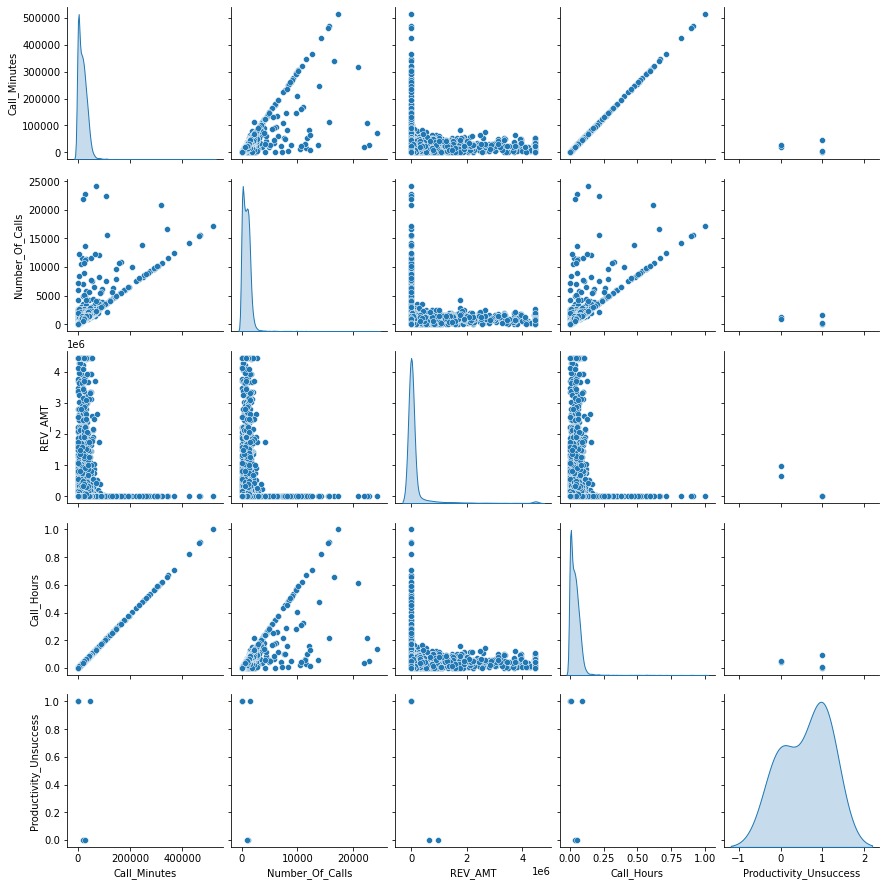

In [493]:
plt.figure(figsize=(10,8))
sns.pairplot(dt_rev,diag_kind= 'kde')

## Checking  Outlier

<AxesSubplot:>

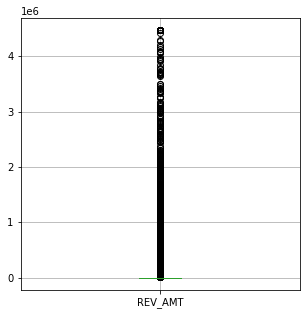

In [494]:
plt.figure(figsize=(5,5))
dt_rev.boxplot(column="REV_AMT")

## Removing the outlier

In [495]:
import numpy as np
for col in dt_rev.columns:
    percentiles = dt_rev['REV_AMT'].quantile([0.01, 0.99]).values
    dt_rev['REV_AMT'] = np.clip(dt_rev['REV_AMT'], percentiles[0], percentiles[1])

<AxesSubplot:>

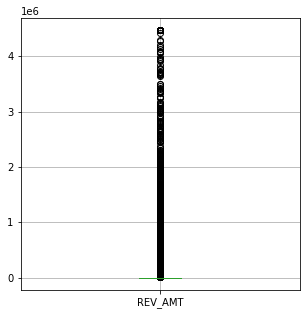

In [496]:
plt.figure(figsize=(5,5))
dt_rev.boxplot(column="REV_AMT")

<AxesSubplot:>

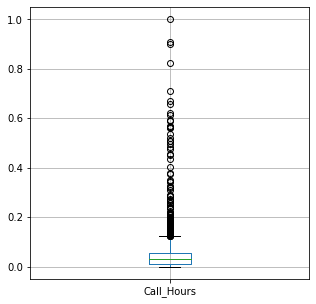

In [545]:
plt.figure(figsize=(5,5))
dt_rev.boxplot(column="Call_Hours")

In [546]:
dt_count = dt_rev.pivot_table(index=['Productivity'], values=['Number_Of_Calls'], aggfunc='sum')
dt_count = dt_count.sort_values('Number_Of_Calls',ascending=False).reset_index() 
dt_count

,Productivity,Number_Of_Calls
0,Unsuccess,5743531
1,Success,1512011


Text(0.5, 1.0, 'Productivity v/s COUNT')

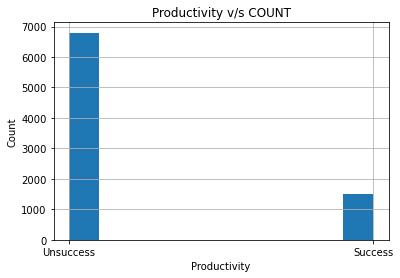

In [547]:
# count plotof win and lost
# plt.style.use('fivethirtyeight')
dt_rev['Productivity'].hist()
plt.xlabel('Productivity')
plt.ylabel('Count')
plt.title('Productivity v/s COUNT')

## Bivariate analysis

In [548]:
dt_dur = dt_rev.pivot_table(index=['Productivity'], values=['Number_Of_Calls'], aggfunc='sum')
# dt_dur = dt_dur.sort_values('HOURS',ascending=False).reset_index() 
dt_dur

,Number_Of_Calls
Productivity,
Success,1512011
Unsuccess,5743531


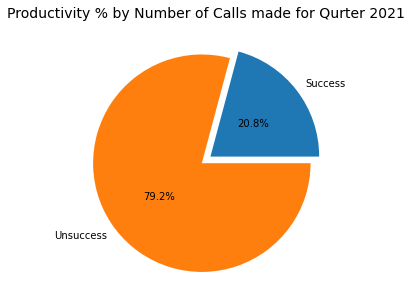

In [549]:
q1_win = dt_rev.groupby("Productivity")["Number_Of_Calls"].sum()
# data.plot.pie(autopct="%.1f%%");
# Using matplotlib
pie, ax = plt.subplots(figsize=[8,5])
labels = q1_win.keys()
plt.pie(x=q1_win, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Productivity % by Number of Calls made for Qurter 2021", fontsize=14);
pie.savefig("q1GeoPieChart.png")

## Scatter plot - REVENUE by Number of Calls

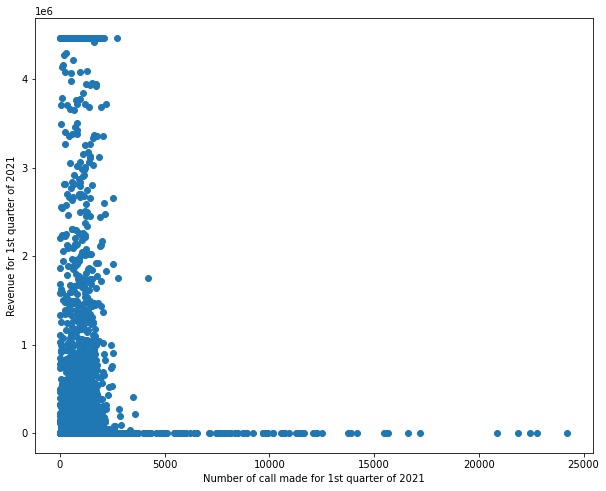

In [550]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(dt_rev['Number_Of_Calls'], dt_rev['REV_AMT'])
ax.set_xlabel('Number of call made for 1st quarter of 2021')
ax.set_ylabel('Revenue for 1st quarter of 2021')
plt.show()

## Line plot - HOURS Vs REVENUE

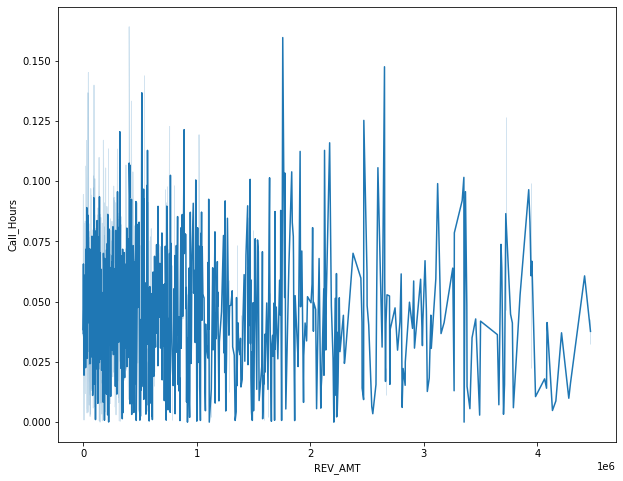

In [551]:
plt.figure(figsize=(10,8))
sns.lineplot(x="REV_AMT", y="Call_Hours", data=dt_rev)
plt.show()

## Revenue Vs Revenue  by Productivity

<AxesSubplot:xlabel='Call_Hours', ylabel='REV_AMT'>

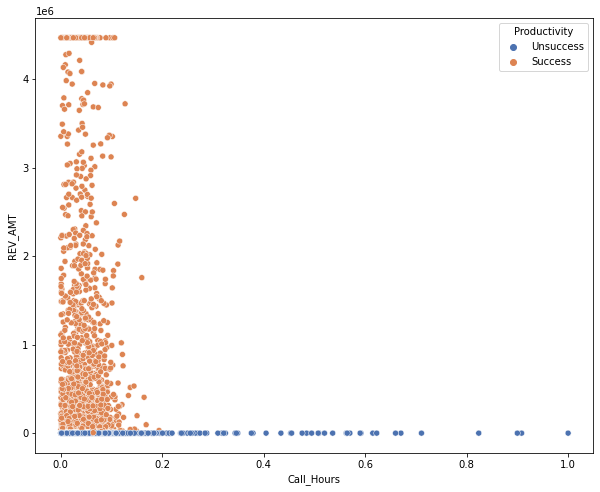

In [552]:
# Plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=dt_rev, x="Call_Hours", y="REV_AMT", hue="Productivity", palette="deep")

<AxesSubplot:xlabel='Number_Of_Calls', ylabel='REV_AMT'>

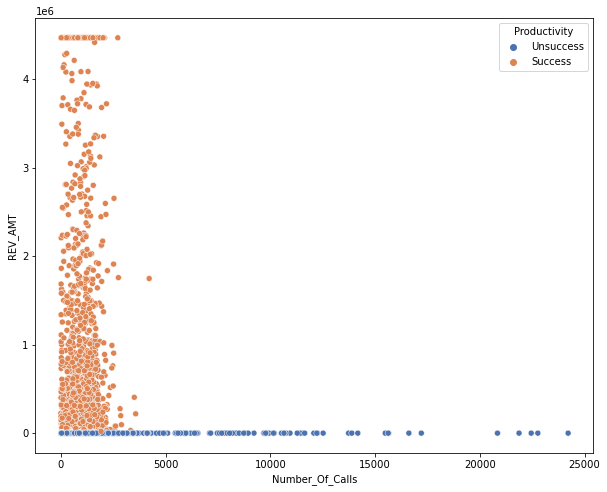

In [556]:
# Plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=dt_rev, x='Number_Of_Calls', y="REV_AMT", hue="Productivity", palette="deep")

## Checking Win/Lost  by Duratioin 

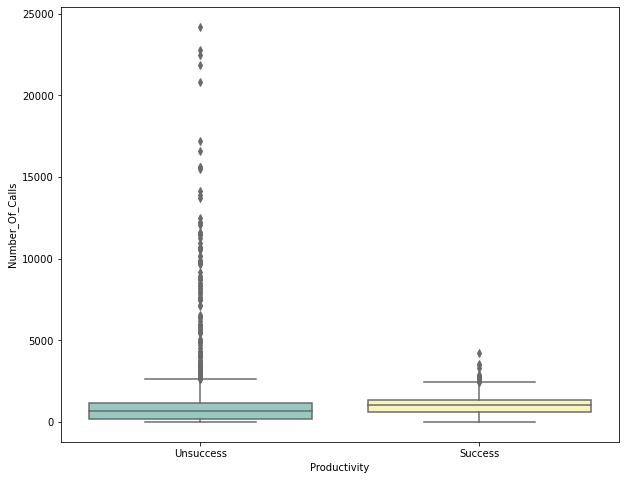

In [557]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Productivity",y="Number_Of_Calls" ,data=dt_rev, palette="Set3")
fig.tight_layout()
plt.show()

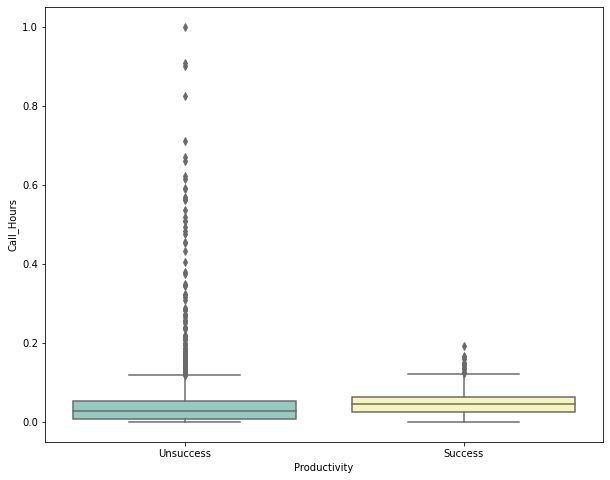

In [558]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Productivity",y="Call_Hours" ,data=dt_rev, palette="Set3")
fig.tight_layout()
plt.show()

In [559]:
# from sklearn.preprocessing import StandardScaler
# std_scale = StandardScaler()
# std_scale
# dt_rev['N_VAL_PIPE'] = std_scale.fit_transform(dt_rev[['N_VAL_PIPE']])

##  Anova one way

In [560]:
formula = 'REV_AMT ~ (Number_Of_Calls)'
model = ols (formula,dt_rev).fit()
aov_tab =  anova_lm(model)
print(aov_tab)

                     df        sum_sq       mean_sq         F    PR(>F)
Number_Of_Calls     1.0  1.407401e+12  1.407401e+12  3.680344  0.055092
Residual         8285.0  3.168268e+15  3.824102e+11       NaN       NaN


In [561]:
formula = 'REV_AMT ~ (Call_Hours)'
model = ols (formula,dt_rev).fit()
aov_tab =  anova_lm(model)
print(aov_tab)

                df        sum_sq       mean_sq         F    PR(>F)
Call_Hours     1.0  1.514088e+12  1.514088e+12  3.959463  0.046641
Residual    8285.0  3.168161e+15  3.823973e+11       NaN       NaN


Assume in our case that we say no changes are impacted to call duration due these variables
P value is here gater then  the 0.05 .




## Anova two  way

In [562]:
formula = 'REV_AMT ~ (Number_Of_Calls) + (Call_Hours)+ (Call_Minutes) + (Number_Of_Calls):(Call_Hours)'
model = ols (formula,dt_rev).fit()
aov_tab =  anova_lm(model,type=2)
print(aov_tab)

                                df        sum_sq       mean_sq          F  \
Number_Of_Calls                1.0  1.407401e+12  1.407401e+12   3.689153   
Call_Hours                     1.0  2.361692e+11  2.361692e+11   0.619059   
Call_Minutes                   1.0  1.050936e+11  1.050936e+11   0.275477   
Number_Of_Calls:Call_Hours     1.0  7.996040e+12  7.996040e+12  20.959641   
Residual                    8283.0  3.159939e+15  3.814970e+11        NaN   

                              PR(>F)  
Number_Of_Calls             0.054802  
Call_Hours                  0.431420  
Call_Minutes                0.599695  
Number_Of_Calls:Call_Hours  0.000005  
Residual                         NaN  


Hereby we observed that no variables are having significant relationship with revenue 

## Pearson’s Correlation Coefficient

In [563]:
from scipy.stats import pearsonr

In [564]:
# # Apply the pearsonr()
list1 = dt_rev['REV_AMT']
list2 = dt_rev['Call_Hours']
stat,p = pearsonr(list1, list2)
print('stat=%.3f, p=%.3f'% (stat, p))

if p >0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.022, p=0.047
Probably dependent


## Average /SD

In [565]:
avg = dt_rev.describe().transpose()

In [566]:
avg

,count,mean,std,min,25%,50%,75%,max
Call_Minutes,8287.0,19876.580910,24210.987226,0.0,4830.000000,16110.000000,28620.000000,516210.0
Number_Of_Calls,8287.0,875.533003,1140.254637,1.0,266.500000,754.000000,1222.000000,24214.0
REV_AMT,8287.0,158041.028116,618493.211384,0.0,0.000000,0.000000,0.000000,4467000.0
Call_Hours,8287.0,0.038505,0.046901,0.0,0.009357,0.031208,0.055443,1.0
Productivity_Unsuccess,5.0,0.600000,0.547723,0.0,0.000000,1.000000,1.000000,1.0
Productivity_Unsuccess,5.0,0.600000,0.547723,0.0,0.000000,1.000000,1.000000,1.0


In [567]:
x=(2.74529e+06)
print("{:f}".format(x)) 

2745290.000000


In [568]:
dt_sum = dt_rev[['Call_Minutes','Number_Of_Calls','REV_AMT','Call_Hours']]
dt_sum.sum().reset_index()
# dt_sum.sum(axis = 0, skipna = True).reset_index()

,index,0
0,Call_Minutes,1.647172e+08
1,Number_Of_Calls,7.255542e+06
2,REV_AMT,1.309686e+09
3,Call_Hours,3.190896e+02


## Covariance

In [569]:
from numpy import cov

list1 = dt_rev['REV_AMT']
list2 = dt_rev['Number_Of_Calls']
covariance = cov(list1, list2)
print(covariance)

[[3.82533853e+11 1.48606660e+07]
 [1.48606660e+07 1.30018064e+06]]


A value of +1.00 would be a perfect (very strong) positive correlation

##  Standarad Correlation 

In [570]:
corrMatrix = dt_rev.corr()
corrMatrix

,Call_Minutes,Number_Of_Calls,REV_AMT,Call_Hours,Productivity_Unsuccess,Productivity_Unsuccess
Call_Minutes,1.000000,0.781774,0.021856,1.000000,-0.216273,-0.216273
Number_Of_Calls,0.781774,1.000000,0.021072,0.781774,-0.421321,-0.421321
REV_AMT,0.021856,0.021072,1.000000,0.021856,-0.965014,-0.965014
Call_Hours,1.000000,0.781774,0.021856,1.000000,-0.216273,-0.216273
Productivity_Unsuccess,-0.216273,-0.421321,-0.965014,-0.216273,1.000000,1.000000
Productivity_Unsuccess,-0.216273,-0.421321,-0.965014,-0.216273,1.000000,1.000000


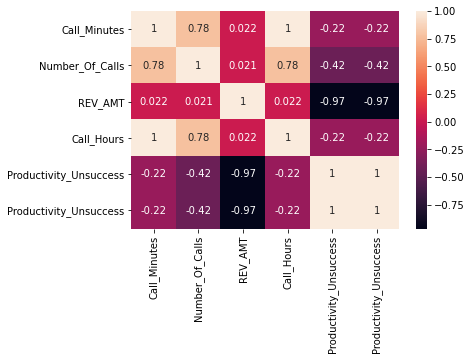

In [571]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

The value of 0.02 shows a positive but weak linear relationship between the two variables. Let’s confirm this with the linear regression correlation tes

## Liner Correlation

In [572]:
## STATSMODELS ###
# create a fitted model
lm1 = smf.ols(formula='REV_AMT ~ Call_Hours', data=dt_rev).fit()
# print the coefficients
lm1.params

Intercept     146943.346860
Call_Hours    288215.265368
dtype: float64

In [573]:
from scipy.stats import linregress

In [574]:
linregress(dt_rev['REV_AMT'], dt_rev['Number_Of_Calls'])

LinregressResult(slope=3.8847976298884506e-05, intercept=869.3934293849426, rvalue=0.021071792943439065, pvalue=0.05509182953208499, stderr=2.024996208189536e-05)

In [575]:
linregress(dt_rev['REV_AMT'], dt_rev['Call_Hours'])

LinregressResult(slope=1.6573692448540211e-09, intercept=0.038242902727425226, rvalue=0.021855871447226363, pvalue=0.04664138976572491, stderr=8.329158759815226e-10)

In [576]:
### SCIKIT-LEARN ###
# create X and y
feature_cols = ['Call_Hours']
X = dt_rev[feature_cols]
y = dt_rev.REV_AMT
# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)
# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

146943.3468595992
[288215.26536759]


In [577]:
### STATSMODELS ###
# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,129714.419654,164172.274065
Call_Hours,4285.851305,572144.679430


The "true" coefficient is either within this interval or it isn't, but there's no way to actually know
We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within

In [578]:
### STATSMODELS ###
# print the p-values for the model coefficients
lm1.pvalues

Intercept     9.765587e-62
Call_Hours    4.664139e-02
dtype: float64

In [579]:
### STATSMODELS ###
# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REV_AMT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.959
Date:                Fri, 04 Jun 2021   Prob (F-statistic):             0.0466
Time:                        13:30:59   Log-Likelihood:            -1.2226e+05
No. Observations:                8287   AIC:                         2.445e+05
Df Residuals:                    8285   BIC:                         2.445e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.469e+05   8789.146     16.719      0.000     1.3e+05    1.64e+05
Call_Hours  2.882e+05   1.45e+05      1.990      0.047    4285.851    5.72e+05
==============================================================================
Omnibus:                     8485.192   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           353790.623
Skew:                           5.320   Prob(JB):                         0.00
Kurtosis:                      33.189   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

if the p-value turns out to be less than 0.05, you can reject the null hypothesis and state that β1 is indeed significant.

## Adding dummie for Productivity

In [580]:
dummies=pd.get_dummies(dt_rev[["Productivity"]],columns=["Productivity"],prefix=["Productivity"],drop_first=True).head()
columns=["Productivity"]
dt_rev = pd.concat([dt_rev,dummies],axis=1)

In [581]:
dt_rev.head()

,SELLER,Call_Minutes,Number_Of_Calls,Sub_Brand,Segment,Geo,Mkt,EMPLOYEE_MGR_L1_NAME,REV_AMT,Call_Hours,Productivity,Productivity_Unsuccess,Productivity_Unsuccess,Productivity_Unsuccess
0,A RAM UM,46770,1559,NaN,NaN,NaN,NaN,NaN,0.0,0.090603,Unsuccess,1.0,1.0,1.0
1,AADIL LAGHZAOUI,21510,1196,Systems HW Cross Brand,Segment 2,EMEA,MEA,Hicham Sbaa,634000.0,0.041669,Success,0.0,0.0,0.0
2,AALISHAN MOOSAVI,1365,68,NaN,NaN,NaN,NaN,NaN,0.0,0.002644,Unsuccess,1.0,1.0,1.0
3,AARON BROWN,27630,994,SW Crossbrand (non z),Segment 2,AMER,PUB,Paula Buerkle,972000.0,0.053525,Success,0.0,0.0,0.0
4,AARON FIELD,3420,129,NaN,NaN,NaN,NaN,NaN,0.0,0.006625,Unsuccess,1.0,1.0,1.0


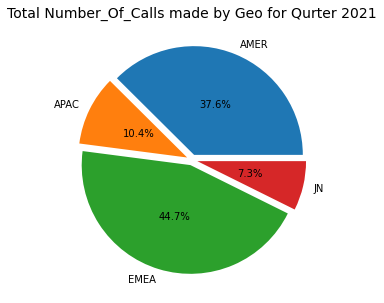

In [582]:
q1_geo = dt_rev.groupby("Geo")["Number_Of_Calls"].sum()
q1_geo
# data.plot.pie(autopct="%.1f%%");
# Using matplotlib
pie, ax = plt.subplots(figsize=[5,5])
labels = q1_geo.keys()
plt.pie(x=q1_geo, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Total Number_Of_Calls made by Geo for Qurter 2021", fontsize=14);
pie.savefig("q1GeoPieChart.png")

In [583]:
dt_geo = dt_rev.pivot_table(index=['Geo'], values=['Number_Of_Calls'], aggfunc='sum')
dt_geo = dt_geo.sort_values('Number_Of_Calls',ascending=False).reset_index() 
dt_geo

,Geo,Number_Of_Calls
0,EMEA,854403
1,AMER,717478
2,APAC,198451
3,JN,140171


<Figure size 1080x576 with 0 Axes>

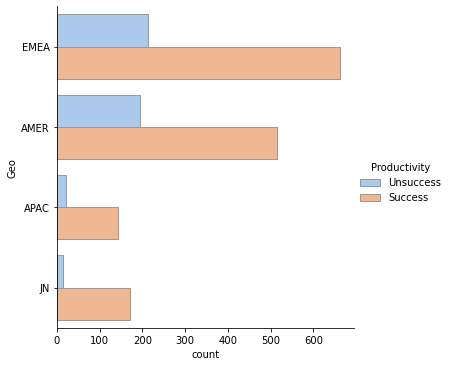

In [584]:
plt.figure(figsize=(15,8))
sns.catplot(y="Geo", hue="Productivity", kind="count",palette="pastel", edgecolor=".6",data=dt_rev)

In [585]:
dt_gct = dt_rev.pivot_table(index=['Geo'], values=['Productivity'], aggfunc='count')
dt_gct = dt_gct.sort_values('Productivity',ascending=False).reset_index() 
dt_gct

,Geo,Productivity
0,EMEA,877
1,AMER,708
2,JN,186
3,APAC,163


<AxesSubplot:xlabel='Geo', ylabel='Number_Of_Calls'>

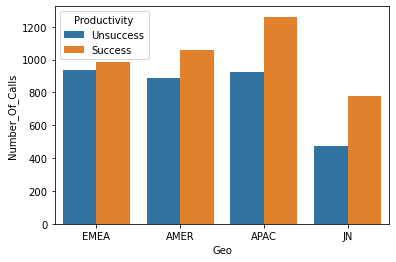

In [586]:
# plt.figure(figsize=(8,8))
sns.barplot(x='Geo', y= 'Number_Of_Calls',data=dt_rev,hue='Productivity',ci=None)

In [587]:
dt_gct = dt_rev.pivot_table(index=['Productivity','Geo'], values=['Number_Of_Calls'], aggfunc='sum')
dt_gct = dt_gct.sort_values('Number_Of_Calls',ascending=False).reset_index() 
dt_gct.head(10)

,Productivity,Geo,Number_Of_Calls
0,Success,EMEA,654375
1,Success,AMER,545452
2,Unsuccess,EMEA,200028
3,Success,APAC,179098
4,Unsuccess,AMER,172026
5,Success,JN,133086
6,Unsuccess,APAC,19353
7,Unsuccess,JN,7085


In [588]:
dt_gct = dt_rev.pivot_table(index=['Productivity','Geo'], values=['Call_Hours'], aggfunc='sum')
dt_gct = dt_gct.sort_values('Call_Hours',ascending=False).reset_index() 
dt_gct.head(10)

,Productivity,Geo,Call_Hours
0,Success,EMEA,30.144815
1,Success,AMER,26.055650
2,Unsuccess,EMEA,9.198782
3,Unsuccess,AMER,8.245402
4,Success,APAC,7.831009
5,Success,JN,5.137332
6,Unsuccess,APAC,0.867166
7,Unsuccess,JN,0.282085


In [589]:
q1_mkt = dt_rev.groupby('Mkt').sum()['Number_Of_Calls'].reset_index()
q1_mkt = q1_mkt.sort_values('Number_Of_Calls',ascending=False).reset_index(drop=True)
q1_mkt.head(10)

,Mkt,Number_Of_Calls
0,DACH,222612
1,PUB,173922
2,JAPAN,140171
3,FSS,133995
4,ITA,123049
5,LA,118293
6,CEE,116345
7,FRA,107828
8,COM,81422
9,MEA,81373


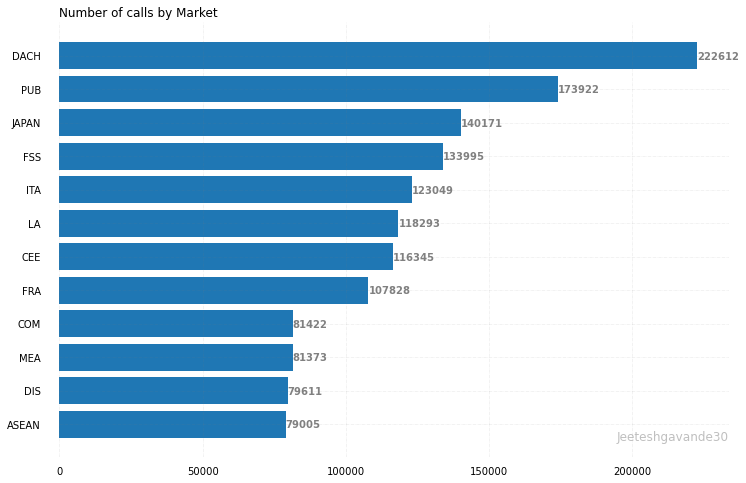

In [590]:
mkt = q1_mkt['Mkt'].head(12)
dur = q1_mkt['Number_Of_Calls'].head(12)
# Figure Size
fig, ax = plt.subplots(figsize =(12, 8)) 
# Horizontal Bar Plot
ax.barh(mkt, dur)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 15)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show top values 
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title('Number of calls by Market  ',
             loc ='left', )
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.5)
# Show Plot
plt.show()

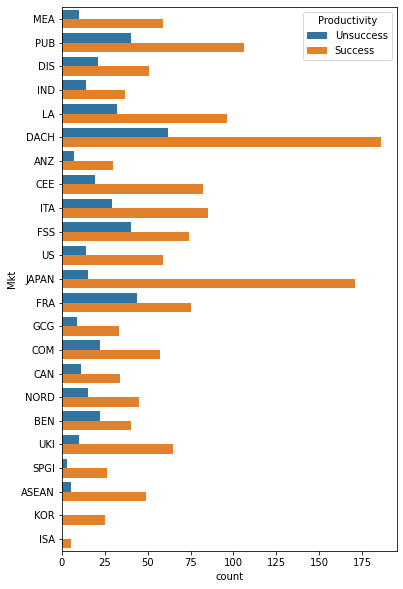

In [591]:
# Mkt  wisn and lost
plt.figure(figsize=(6,10))
sns.countplot(y ='Mkt', hue = "Productivity", data = dt_rev)
# Show the plot
plt.show()

<AxesSubplot:xlabel='Mkt', ylabel='Number_Of_Calls'>

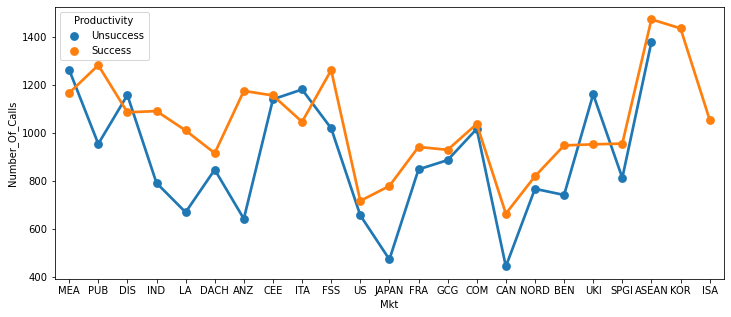

In [592]:
# Mkt Hours with win and lost
plt.figure(figsize=(12,5))
sns.pointplot(x='Mkt', y= 'Number_Of_Calls',data=dt_rev,hue='Productivity',ci=None)

<AxesSubplot:xlabel='Segment', ylabel='Call_Hours'>

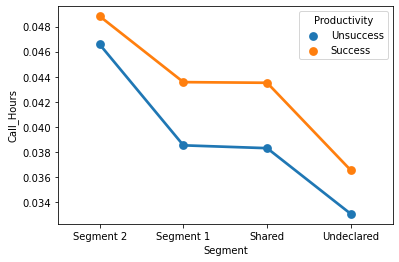

In [593]:
# Segment wise win and lost 
sns.pointplot(x='Segment', y= 'Call_Hours',data=dt_rev,hue='Productivity',ci=None)

In [594]:
dt_win = dt_rev.pivot_table(index=['Productivity','SELLER'], values=['Call_Hours'], aggfunc='sum')
dt_win = dt_win.sort_values('Call_Hours',ascending=False).reset_index() 

In [595]:
dt_win.head(10)

,Productivity,SELLER,Call_Hours
0,Unsuccess,CLARA OGWUAZOR MBAMALU,1.000000
1,Unsuccess,GLENN DARCY,0.908235
2,Unsuccess,JAGATHESYWARA GOOPAALAN,0.899924
3,Unsuccess,AQULIA ZIXUAN NG,0.823793
4,Unsuccess,VALERIE KNIBBELER,0.710903
5,Unsuccess,CERISE CELLIER,0.670425
6,Unsuccess,CHARLES SINGLETON,0.659790
7,Unsuccess,JUDY WEE NAH LIM,0.622625
8,Unsuccess,ALONZO WEATHERBY,0.614924
9,Unsuccess,KAIJUN CHIN,0.591678


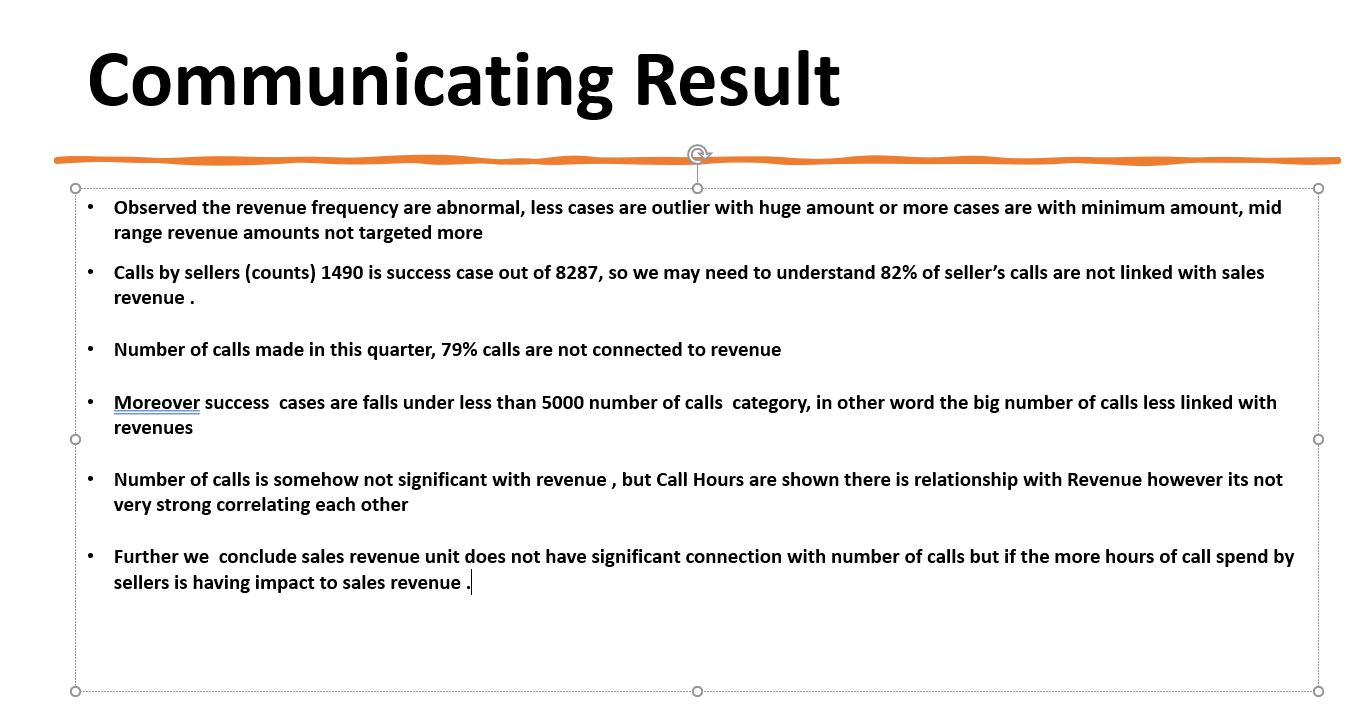
